<a href="https://colab.research.google.com/github/andrewright17/Homework-1-Deep-Learning/blob/main/HW1_problem1_wright_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1-1 Simulate Function
## Google Colab updates

In [1]:
### import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set random seed
torch.manual_seed(42)

In [2]:
### Model Classes

# Create the neural network model
class model_class_1(nn.Module):
    def __init__(self, D_i, D_k1, D_k2, D_k3, D_o):
        super(model_class_1, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_i, D_k1),
            nn.ReLU(),
            nn.Linear(D_k1, D_k2),
            nn.ReLU(),
            nn.Linear(D_k2, D_k3),
            nn.ReLU(),
            nn.Linear(D_k3, D_o)
        )

    def forward(self, x):
        return self.layers(x)

# Create test model for parameter size check
model1_test = model_class_1(D_i = 1, D_k1 = 16, D_k2 = 8, D_k3 = 2, D_o = 1) #189 params

# Create the neural network model
class model_class_2(nn.Module):
    def __init__(self, D_i, D_k1, D_k2, D_o):
        super(model_class_2, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_i, D_k1),
            nn.ReLU(),
            nn.Linear(D_k1, D_k2),
            nn.ReLU(),
            nn.Linear(D_k2, D_o)
        )

    def forward(self, x):
        return self.layers(x)

# Create test model for parameter size check
model2_test = model_class_2(D_i = 1, D_k1 = 30, D_k2 = 4, D_o = 1) #189 params

In [3]:
### Check model sizes are the same
model1_parameters = filter(lambda p: p.requires_grad, model1_test.parameters())
params1 = sum([np.prod(p.size()) for p in model1_parameters])
model2_parameters = filter(lambda p: p.requires_grad, model2_test.parameters())
params2 = sum([np.prod(p.size()) for p in model2_parameters])
print(params1, params2)

189 189


In [4]:
### Weight initialization
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal(layer_in.weight)
        layer_in.bias.data.fill_(0.0)

In [5]:
### Define first function
# Define the function to approximate
def fn1(x):
    return 5*torch.sin(0.5*x)**2

In [6]:
### Generate training data
x_train = torch.linspace(-2 * torch.pi, 2 * torch.pi, 2000).unsqueeze(1)
y_train = fn1(x_train)

# New Model Class

In [10]:
class model_class(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes=None):
        super(model_class, self).__init__()

        # Store model architecture parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes or []

        # Create layers
        layers = []
        in_features = input_size
        for h_size in hidden_sizes:
            layers.append(nn.Linear(in_features, h_size))
            layers.append(nn.ReLU())  # Add activation after each hidden layer
            in_features = h_size
        layers.append(nn.Linear(in_features, output_size))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        # Forward pass through the layers
        for layer in self.layers:
            x = layer(x)
        return x


In [11]:
def train_model(model, X_train, Y_train, batch, epochs, learning_rate):
  # load training data for model 1
  data_loader = DataLoader(TensorDataset(X_train,Y_train), batch_size=batch, shuffle = True)

  # Create optimizer and loss function
  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  loss_fn = nn.MSELoss()

  # Training loop for model 1
  loss_vec = []
  for epoch in range(epochs):
      epoch_loss = 0.0
      for i,data in enumerate(data_loader):
          x_batch, y_batch = data
          optimizer.zero_grad()
      #print(x_train.shape)
          y_pred = model(x_batch)
          loss = loss_fn(y_pred, y_batch)
          loss.backward()
          optimizer.step()
          epoch_loss += loss.item()
      loss_vec1.append(epoch_loss)
  return loss_vec


In [ ]:
# test model function and class
model_test = model_class(input_size = 1, output_size = 1, hidden_sizes = [64,32])
model_test_loss = train_model(model_test, x_train, y_train, batch = 100, epochs = 10, learning_rate = 0.001)
# Evaluate the model
x_test = torch.linspace(-2 * torch.pi, 2 * torch.pi, 100).unsqueeze(1)
y_test = fn1(x_test)
y_pred1 = model_test(x_test)
### Visualize plots
plt.plot(x_test.detach(), y_test.detach(), label="True function", color = 'black')
plt.plot(x_test.detach(), y_pred1.detach(), label="Model1", color = 'orange', linestyle = 'dashed')
#plt.plot(x_test.detach(), y_pred2.detach(), label="Model2", color = 'blue', linestyle = 'dashed')
plt.legend()
plt.show()
plt.plot(np.arange(0,len(model_test_loss),1),np.array(model_test_loss), label="Model 1 loss", color = 'orange')
#plt.plot(np.arange(0,len(loss_vec1),1),np.array(loss_vec2), label="Model 2 loss", color = 'blue')
#plt.ylim(10**-6, 1)
plt.legend()
plt.show()

In [7]:
### Model 1 training and eval
model1 = model_class_1(D_i = 1, D_k1 = 16, D_k2 = 8, D_k3 = 2, D_o = 1) #189 params

model1.apply(weights_init)

# Create optimizer and loss function
optimizer = optim.Adam(model1.parameters(), lr = 0.01)
loss_fn = nn.MSELoss()

# load training data for model 1
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=100, shuffle = True)

# Training loop for model 1
loss_vec1 = []
for epoch in range(200):
    epoch_loss = 0.0
    for i,data in enumerate(data_loader):
        x_batch, y_batch = data
        optimizer.zero_grad()
    #print(x_train.shape)
        y_pred = model1(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_vec1.append(epoch_loss)
# Evaluate the model
x_test = torch.linspace(-2 * torch.pi, 2 * torch.pi, 100).unsqueeze(1)
y_test = fn1(x_test)
y_pred1 = model1(x_test)

# Visualize the results (optional)
'''plt.plot(x_test.detach(), y_test.detach(), label="True function")
plt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))'''

<ipython-input-4-c5b4c2b02719>:4: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(layer_in.weight)


'plt.plot(x_test.detach(), y_test.detach(), label="True function")\nplt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")\nplt.legend()\nplt.show()\nplt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))'

In [8]:
print(y_pred1)

tensor([[2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2.4672],
        [2

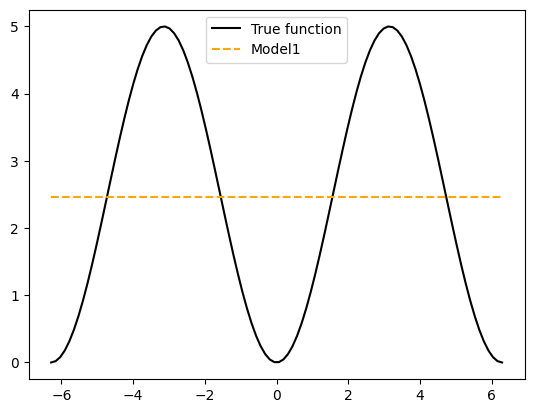

In [9]:
### Visualize plots
plt.plot(x_test.detach(), y_test.detach(), label="True function", color = 'black')
plt.plot(x_test.detach(), y_pred1.detach(), label="Model1", color = 'orange', linestyle = 'dashed')
#plt.plot(x_test.detach(), y_pred2.detach(), label="Model2", color = 'blue', linestyle = 'dashed')
plt.legend()
plt.show()

In [ ]:
### Model 2 training and eval
model2 = model_class_2(D_i = 1, D_k1 = 30, D_k2 = 4, D_o = 1) #189 params

model2.apply(weights_init)

# Create optimizer and loss function
optimizer = optim.Adam(model2.parameters(), lr = 0.01)
loss_fn = nn.MSELoss()


# load training data for model 2
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=20, shuffle = True)

# Training loop for model 2
loss_vec2 = []
for epoch in range(2000):
    epoch_loss = 0.0
    for i,data in enumerate(data_loader):
        x_batch, y_batch = data
        optimizer.zero_grad()
    #print(x_train.shape)
        y_pred = model2(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_vec2.append(epoch_loss)
# Evaluate the model
y_pred2 = model2(x_test)

# Visualize the results (optional)
'''plt.plot(x_test.detach(), y_test.detach(), label="True function")
plt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))'''

/var/folders/jh/r6dw_vvs653cb7khs9z0tx1h0000gn/T/ipykernel_74978/1361061646.py:4: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  nn.init.kaiming_uniform(layer_in.weight)


'plt.plot(x_test.detach(), y_test.detach(), label="True function")\nplt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")\nplt.legend()\nplt.show()\nplt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))'

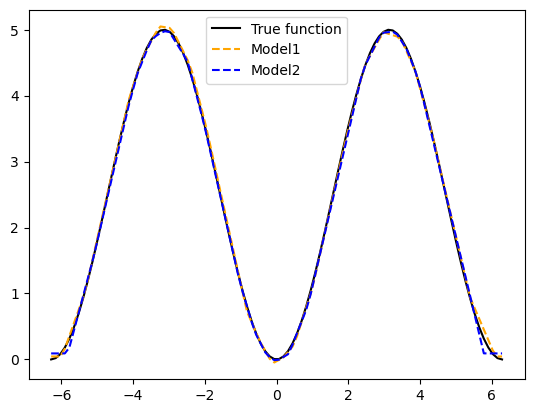

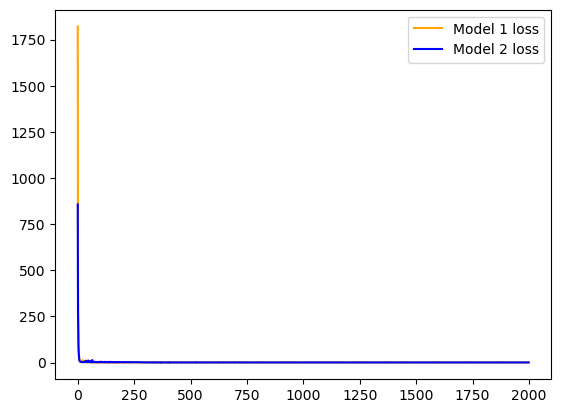

In [ ]:
### Visualize plots
plt.plot(x_test.detach(), y_test.detach(), label="True function", color = 'black')
plt.plot(x_test.detach(), y_pred1.detach(), label="Model1", color = 'orange', linestyle = 'dashed')
plt.plot(x_test.detach(), y_pred2.detach(), label="Model2", color = 'blue', linestyle = 'dashed')
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec1),1),np.array(loss_vec1), label="Model 1 loss", color = 'orange')
plt.plot(np.arange(0,len(loss_vec1),1),np.array(loss_vec2), label="Model 2 loss", color = 'blue')
#plt.ylim(10**-6, 1)
plt.legend()
plt.show()

In [ ]:
'''### want to write function to train model
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()'''

'### want to write function to train model\ndef train_model(model, optimizer, data_loader, loss_module, num_epochs=100):\n    # Set model to train mode\n    model.train() \n    \n    # Training loop\n    for epoch in tqdm(range(num_epochs)):\n        for data_inputs, data_labels in data_loader:\n            \n            ## Step 1: Move input data to device (only strictly necessary if we use GPU)\n            data_inputs = data_inputs.to(device)\n            data_labels = data_labels.to(device)\n            \n            ## Step 2: Run the model on the input data\n            preds = model(data_inputs)\n            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]\n            \n            ## Step 3: Calculate the loss\n            loss = loss_module(preds, data_labels.float())\n            \n            ## Step 4: Perform backpropagation\n            # Before calculating the gradients, we need to ensure that they are all zero. \n            # The grad